In [2]:
import pandas
import numpy
import matplotlib
import wordcloud
import nltk
import sklearn
import pandas as pd

###导入智慧养老政策文本，做好前期的基础数据准备

In [3]:
df = pd.read_csv('C:/Users/20693/Desktop/智慧养老政策.csv', encoding='gbk',index_col = 0)
df

,标题,时效性,效力位阶,制定机关,发文字号,公布日期,施行日期,批准部门,批准日期,原文链接
序号,,,,,,,,,,
地方规范性文件_672,黑龙江省人民政府办公厅关于推进养老服务发展的实施意见,现行有效,地方规范性文件,黑龙江省民政厅,NaN,NaN,NaN,NaN,NaN,https://www.pkulaw.com/lar/b18e6be8f51692a1cbd...
地方规范性文件_673,广西壮族自治区大数据发展局关于全面推进数字化转型发展的意见,现行有效,地方规范性文件,广西壮族自治区大数据发展局,NaN,NaN,NaN,NaN,NaN,https://www.pkulaw.com/lar/22f0c8beef6908e6866...
地方规范性文件_674,中共无锡市委、无锡市人民政府印发《＜关于加快推进数字经济高质量发展的实施意见＞＜关于加快推进...,现行有效,地方规范性文件,无锡市人民政府,NaN,NaN,NaN,NaN,NaN,https://www.pkulaw.com/lar/42b6a5f466eaa99be8e...
地方规范性文件_675,贵阳市民政局关于推进贵阳贵安养老服务高质量发展的实施意见,现行有效,地方规范性文件,贵阳市民政局,NaN,NaN,NaN,NaN,NaN,https://www.pkulaw.com/lar/e67d28d08fea8084a66...
地方规范性文件_676,廊坊市人民政府办公室关于加快推进养老服务体系建设的实施意见,现行有效,地方规范性文件,廊坊市人民政府,NaN,NaN,NaN,NaN,NaN,https://www.pkulaw.com/lar/909deb5c2273a94ef8b...
...,...,...,...,...,...,...,...,...,...,...
地方工作文件_15,郑州市人民政府关于印发郑州市数字政府建设行动方案的通知,现行有效,地方工作文件,郑州市人民政府,郑政〔2023〕25号,2023.12.25,2023.12.25,NaN,NaN,https://www.pkulaw.com/lar/b7908e42b1682d8bafd...
部门规章_1,产业结构调整指导目录(2024年本),尚未施行,部门规章,国家发展和改革委员会(含原国家发展计划委员会、原国家计划委员会),中华人民共和国国家发展和改革委员会令第7号,2023.12.27,2024.02.01,NaN,NaN,https://www.pkulaw.com/chl/d8513a2dd8e4e297bdf...
地方工作文件_14,山西省人民政府办公厅关于印发山西省数字政府建设规划(2023―2025年)的通知,现行有效,地方工作文件,山西省人民政府,晋政办发〔2023〕82号,2023.12.28,2023.12.28,NaN,NaN,https://www.pkulaw.com/lar/cf041968e90d5c7d666...


In [4]:
# 分词
import jieba # 中文分词

def clean_text(text):
    words = jieba.lcut(text)    
    return ' '.join(words)


In [5]:
test = df['标题'][0]
clean_text(test)

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\20693\AppData\Local\Temp\jieba.cache
Loading model cost 2.035 seconds.
Prefix dict has been built successfully.


'黑龙江省 人民政府 办公厅 关于 推进 养老 服务 发展 的 实施 意见'

In [6]:
df['标题分词'] = df['标题'].apply(clean_text)
df

,标题,时效性,效力位阶,制定机关,发文字号,公布日期,施行日期,批准部门,批准日期,原文链接,标题分词
序号,,,,,,,,,,,
地方规范性文件_672,黑龙江省人民政府办公厅关于推进养老服务发展的实施意见,现行有效,地方规范性文件,黑龙江省民政厅,NaN,NaN,NaN,NaN,NaN,https://www.pkulaw.com/lar/b18e6be8f51692a1cbd...,黑龙江省 人民政府 办公厅 关于 推进 养老 服务 发展 的 实施 意见
地方规范性文件_673,广西壮族自治区大数据发展局关于全面推进数字化转型发展的意见,现行有效,地方规范性文件,广西壮族自治区大数据发展局,NaN,NaN,NaN,NaN,NaN,https://www.pkulaw.com/lar/22f0c8beef6908e6866...,广西壮族自治区 大 数据 发展局 关于 全面 推进 数字化 转型 发展 的 意见
地方规范性文件_674,中共无锡市委、无锡市人民政府印发《＜关于加快推进数字经济高质量发展的实施意见＞＜关于加快推进...,现行有效,地方规范性文件,无锡市人民政府,NaN,NaN,NaN,NaN,NaN,https://www.pkulaw.com/lar/42b6a5f466eaa99be8e...,中共 无锡市委 、 无锡市 人民政府 印发 《 ＜ 关于 加快 推进 数字 经济 高质量 发...
地方规范性文件_675,贵阳市民政局关于推进贵阳贵安养老服务高质量发展的实施意见,现行有效,地方规范性文件,贵阳市民政局,NaN,NaN,NaN,NaN,NaN,https://www.pkulaw.com/lar/e67d28d08fea8084a66...,贵阳市 民政局 关于 推进 贵阳 贵安 养老 服务 高质量 发展 的 实施 意见
地方规范性文件_676,廊坊市人民政府办公室关于加快推进养老服务体系建设的实施意见,现行有效,地方规范性文件,廊坊市人民政府,NaN,NaN,NaN,NaN,NaN,https://www.pkulaw.com/lar/909deb5c2273a94ef8b...,廊坊市 人民政府 办公室 关于 加快 推进 养老 服务体系 建设 的 实施 意见
...,...,...,...,...,...,...,...,...,...,...,...
地方工作文件_15,郑州市人民政府关于印发郑州市数字政府建设行动方案的通知,现行有效,地方工作文件,郑州市人民政府,郑政〔2023〕25号,2023.12.25,2023.12.25,NaN,NaN,https://www.pkulaw.com/lar/b7908e42b1682d8bafd...,郑州市 人民政府 关于 印发 郑州市 数字 政府 建设 行动 方案 的 通知
部门规章_1,产业结构调整指导目录(2024年本),尚未施行,部门规章,国家发展和改革委员会(含原国家发展计划委员会、原国家计划委员会),中华人民共和国国家发展和改革委员会令第7号,2023.12.27,2024.02.01,NaN,NaN,https://www.pkulaw.com/chl/d8513a2dd8e4e297bdf...,产业 结构调整 指导 目录 ( 2024 年本 )
地方工作文件_14,山西省人民政府办公厅关于印发山西省数字政府建设规划(2023―2025年)的通知,现行有效,地方工作文件,山西省人民政府,晋政办发〔2023〕82号,2023.12.28,2023.12.28,NaN,NaN,https://www.pkulaw.com/lar/cf041968e90d5c7d666...,山西省人民政府 办公厅 关于 印发 山西省 数字 政府 建设 规划 ( 2023 ― 202...


###到这一步，已经做好了数据分词工作，开始正式构建模型

###接下来来到，词向量模型，这一个板块

In [8]:
from gensim.test.utils import common_texts
common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [10]:
corpus = df['标题分词'].apply(lambda x: x.split()).tolist() #lambda x: x.split() 匿名函数将每个文本按空格分割成词语列表,.tolist() 方法将结果转换为一个列表
for document in corpus[:10]: #for document in corpus[:10]: 遍历了 corpus 列表的前10个文档
    print(document)

['黑龙江省', '人民政府', '办公厅', '关于', '推进', '养老', '服务', '发展', '的', '实施', '意见']
['广西壮族自治区', '大', '数据', '发展局', '关于', '全面', '推进', '数字化', '转型', '发展', '的', '意见']
['中共', '无锡市委', '、', '无锡市', '人民政府', '印发', '《', '＜', '关于', '加快', '推进', '数字', '经济', '高质量', '发展', '的', '实施', '意见', '＞', '＜', '关于', '加快', '推进', '总部', '经济', '高质量', '发展', '的', '实施', '意见', '＞', '＜', '关于', '加快', '推进', '枢纽', '经济', '高质量', '发展', '的', '实施', '意见', '＞', '》', '的', '通知']
['贵阳市', '民政局', '关于', '推进', '贵阳', '贵安', '养老', '服务', '高质量', '发展', '的', '实施', '意见']
['廊坊市', '人民政府', '办公室', '关于', '加快', '推进', '养老', '服务体系', '建设', '的', '实施', '意见']
['上海市浦东新区', '民政局', '关于', '街道', '(', '镇', ')', '老年人', '综合', '服务中心', '服务', '功能', '和', '设施', '配置', '的', '通知']
['厦门市', '人民政府', '关于', '印发', '加快', '发展', '养老', '服务业', '实施', '意见', '的', '通知']
['北京市', '平谷区', '人民政府', '关于', '印发', '《', '加快', '信息化', '发展', '建设', '“', '智慧', '平谷', '”', '的', '意见', '》', '的', '通知']
['南平市', '人民政府', '关于', '加快', '发展', '养老', '服务业', '的', '实施', '意见']
['烟台市', '人民政府', '办公室', '关于', '促进', '信息', '消费', '扩大内需', '的',

In [11]:
# 自己的训练词嵌入模型
from gensim.models import Word2Vec

###，Word2Vec模型：将词语映射到低维向量空间，将相似上下文的词语放在一起，使得词语之间的关系可以通过向量之间的距离或者余弦相似度来表示

In [12]:
# 训练词嵌入模型
model = Word2Vec(
    corpus,     # 训练预料
    window = 5,     # 训练算法考虑的当前词语与预测词语在一个句子中的最大距离（窗口大小）
    vector_size = 100,     # 自定义训练向量维度
    min_count = 1,     # 忽略所有总频数低于这个值的词语
    epochs = 10
)

model.save('word2vec_ad.model')

###从训练好的Word2Vec模型中获取词汇表和对应的词向量

In [15]:
word_list = model.wv.index_to_key  
word_vectors = model.wv[word_list]  #将词汇转化成向量
#{word}代表词语，{vector}代表词向量。

# 打印词汇表和对应的词向量
for word, vector in list(zip(word_list, word_vectors))[:10]:
    print(f'{word}: {vector}')

的: [-4.80743730e-03  5.42771891e-02  3.19376290e-01  3.47464859e-01
 -3.11689258e-01 -7.65855908e-01  3.86671454e-01  1.29512370e+00
 -7.09598243e-01 -6.86772883e-01  3.72720003e-01 -1.03362381e+00
  1.82045296e-01  4.31076676e-01  1.22244090e-01 -9.40604568e-01
  3.42183262e-01 -3.19546580e-01  7.69943967e-02 -6.30427122e-01
  2.57493444e-02  9.96992290e-02 -4.03789967e-01 -1.62036523e-01
  6.04163930e-02 -4.20021117e-01 -4.42640275e-01 -1.03738181e-01
 -3.74460012e-01  2.01238077e-02 -4.13142964e-02 -9.90351662e-02
  7.04753637e-01 -8.35387409e-01 -8.93510580e-01  4.94101733e-01
 -5.22577047e-01 -7.39478528e-01  4.71985251e-01 -1.62745357e+00
 -1.21834084e-01 -1.26891822e-01 -3.61114852e-02  1.61805644e-03
 -3.66171934e-02 -5.34837782e-01 -2.80666947e-01 -9.44901705e-02
  2.24445492e-01  4.23769206e-01 -1.86104476e-01 -1.90806121e-01
  2.14147240e-01  4.15084898e-01  3.54561359e-01 -5.02600551e-01
  2.39924163e-01 -3.30570519e-01 -2.93417454e-01 -4.54642065e-02
  1.78702623e-01  1.89

###已经把词汇变成了词向量，所以词语之间的关联度就可以用向量数据来表示

In [17]:
# 检查词嵌入模型中任意两个词向量的余弦相似度，即语义接近性
# 余弦相似度的取值介于[-1, 1]之间，-1表示语义完全相反，1表示语义完全相同，0表示毫无关系
# model.sv.similarity
print(model.wv.similarity('关于', '推进'))
print(model.wv.similarity('养老', '发展'))
print(model.wv.similarity('养老', '服务'))
print(model.wv.similarity('养老', '高质量'))
print(model.wv.similarity('经济', '高质量'))

0.74430424
0.45134497
0.9636779
0.84686756
0.5763194


In [18]:
# 可视化

words = ['养老', '服务', '发展', '高质量']
vectors = [model.wv[word] for word in words]

from sklearn.decomposition import PCA     # 语义空间降维，用于展示词语在二维空间的相对位置

###PCA（主成分分析）通过线性变换将数据映射到低维空间，比如建立一个新的图表，来说明问题

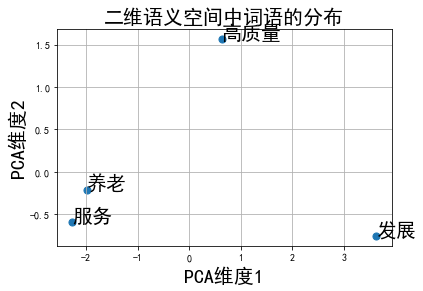

In [19]:
# 使用PCA进行降维
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(vectors) 
import matplotlib.pyplot as plt

# 绘制四个词语在二维空间的相对位置
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.figure()

# 取PCA降维结果中所有行的第一列和第二列数据绘制散点图，设置点的大小为50
plt.scatter(pca_result[:, 0], pca_result[:, 1], s = 50)

for i, word in enumerate(words):
    plt.annotate(word, (pca_result[i, 0], pca_result[i, 1]), fontsize = 20)

plt.xlabel('PCA维度1', fontsize = 20)
plt.ylabel('PCA维度2', fontsize = 20)
plt.title('二维语义空间中词语的分布', fontsize = 20)
plt.grid(True)
plt.show()